Group 3 - Homework 3
Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [2]:
used_car_df = pd.read_csv('/workspaces/Marquette_teaching_finance/used_cars.csv')

In [3]:
used_car_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
used_car_df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [5]:
# extract mileage number and price numbers
used_car_df['mileage_num'] = used_car_df['milage'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(float)
used_car_df['price_num'] = used_car_df['price'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(float)


In [6]:
used_car_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,mileage_num,price_num
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",51000.0,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",34742.0,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598",22372.0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",88900.0,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999",9835.0,34999.0


In [7]:
categorical_cols = ['fuel_type','clean_title','engine','transmission','ext_col','int_col']
selected_columns = ['fuel_type','clean_title','engine','transmission','ext_col','int_col']
new_df=used_car_df[selected_columns]
df_encoded = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)

In [8]:
df_encoded.columns

Index(['fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–',
       'engine_1.3L I3 12V GDI DOHC Turbo',
       'engine_1.3L I3 12V MPFI DOHC Turbo',
       'engine_1.4L I4 16V GDI DOHC Turbo', 'engine_1.5 Liter Turbo',
       ...
       'int_col_Titan Black / Quarzit', 'int_col_Tupelo',
       'int_col_Very Light Cashmere', 'int_col_WHITE', 'int_col_Walnut',
       'int_col_Whisper Beige', 'int_col_White', 'int_col_White / Brown',
       'int_col_Yellow', 'int_col_–'],
      dtype='object', length=1685)

In [9]:
df_encoded = pd.concat([used_car_df[['model_year','price_num','mileage_num']], df_encoded], axis=1)

In [10]:
df_encoded.head()

,model_year,price_num,mileage_num,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,engine_1.3L I3 12V GDI DOHC Turbo,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,2013,10300.0,51000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,38005.0,34742.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,54598.0,22372.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,15500.0,88900.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,34999.0,9835.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
used_car_df=df_encoded

In [12]:
used_car_df.head()

,model_year,price_num,mileage_num,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,engine_1.3L I3 12V GDI DOHC Turbo,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,2013,10300.0,51000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,38005.0,34742.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,54598.0,22372.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,15500.0,88900.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,34999.0,9835.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


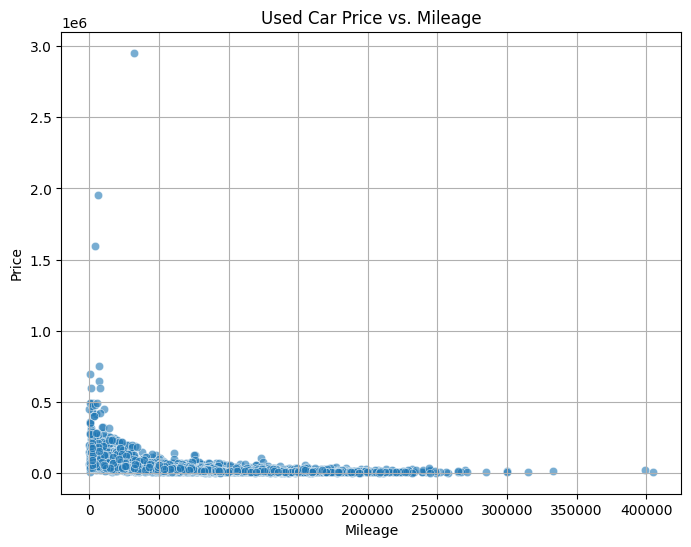

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6)

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Used Car Price vs. Mileage")
plt.grid(True)

# Show plot
plt.show()

In [14]:
print(f'before getting rid of anomalies, there are {used_car_df.shape[0]} rows')
used_car_df = used_car_df[(used_car_df['price_num'] < 300000) & (used_car_df['mileage_num'] < 250000) ]
used_car_df = used_car_df[(used_car_df['price_num'] > 0) & (used_car_df['mileage_num'] > 0) ]
print(f'after getting rid of anomalies, there are {used_car_df.shape[0]} rows')

before getting rid of anomalies, there are 4009 rows
after getting rid of anomalies, there are 3966 rows


Part 2:

In [15]:
excluded_columns = [col for col in used_car_df.columns if col != 'price_num']

   # Print the excluded columns
print(excluded_columns)

['model_year', 'mileage_num', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–', 'engine_1.3L I3 12V GDI DOHC Turbo', 'engine_1.3L I3 12V MPFI DOHC Turbo', 'engine_1.4L I4 16V GDI DOHC Turbo', 'engine_1.5 Liter Turbo', 'engine_1.5L I3 12V GDI DOHC Turbo', 'engine_1.5L I3 12V PDI DOHC Turbo', 'engine_1.5L I4 16V GDI DOHC Turbo', 'engine_1.6L I-4 gasoline direct injection, DOHC, variable valve control', 'engine_1.6L I4 16V GDI DOHC', 'engine_1.6L I4 16V GDI DOHC Hybrid', 'engine_1.6L I4 16V GDI DOHC Turbo', 'engine_1.6L I4 16V GDI DOHC Turbo Hybrid', 'engine_1.6L I4 16V MPFI DOHC', 'engine_1.8 Liter', 'engine_101.0HP 1.4L 4 Cylinder Engine Gasoline Fuel', 'engine_1020.0HP Electric Motor Electric Fuel System', 'engine_104.0HP 1.6L 4 Cylinder Engine Gasoline Fuel', 'engine_106.0HP 1.5L 4 Cylinder Engine Gasoline Fuel', 'engine_107.0HP Electric Motor Electric Fuel System', 'engine_109.0HP 1.5L 4 Cylinder

In [16]:
# Prepare X and y
X = used_car_df[excluded_columns]
y = used_car_df['price_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

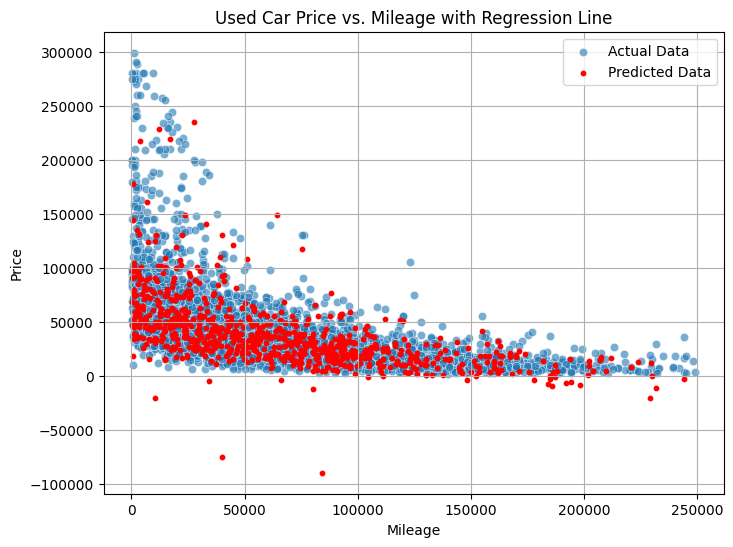

Model equation: Price = 1254.35 *Mileage + -2510873.72


In [19]:
# Generate predictions for the regression line

price_pred = model.predict(X_test)

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df,x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

# Plot regression line
# plt.plot(y_test, price_pred, color="red", linewidth=2, label="Regression Line")
plt.scatter(X_test["mileage_num"], price_pred, color="red", s=10, label="Predicted Data") #Corrected line


# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Used Car Price vs. Mileage with Regression Line")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print model equation
print(f"Model equation: Price = {model.coef_[0]:.2f} *Mileage + {model.intercept_:.2f}")

In [18]:
mse = mean_squared_error(y_test, price_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 23797.184894078746


This model is not very accurate.

Part 3

In [ ]:

# Choose a k
k = 5

# Create and train KNN model
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Generate predictions
price_pred = knn.predict(X_test)

# Ensure prices are non-negative
price_pred = np.maximum(price_pred, 0)

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

# Plot KNN regression curve
plt.plot(y_test, price_pred, color="red", linewidth=2, label=f"KNN Regression (k={k})")

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(f"Used Car Price vs. Mileage with KNN Regression (k={k})")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
mse = mean_squared_error(y_test, price_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

The KNN model looks better, but the linear regression model has a lower RMSE.
We found it difficult to interpret the graph as there were so many independent variables but we were only plotting against mileage.

